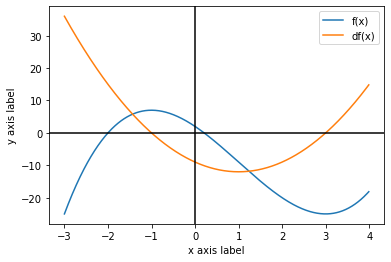

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-3, 4, 0.01)
f_x = np.power(x,3)-3*x**2-9*x+2
df_x = 3*x**2-6*x-9

plt.plot(x,f_x)
plt.plot(x,df_x)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.legend(['f(x)', "df(x)"])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

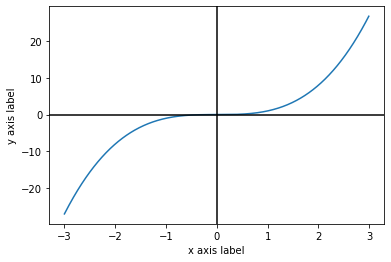

In [3]:
x = np.arange(-3, 3, 0.01)
f_x = np.power(x,3)

plt.plot(x,f_x)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

In [4]:
def gradient_descent(df,x,alpha=0.01, iterations = 100,epsilon = 1e-8):
    history=[x]
    for i in range(iterations):
        if abs(df(x))<epsilon:
            print("梯度足够小！")
            break
        x = x-alpha* df(x)        
        history.append(x)
    return history

In [5]:
df = lambda x: 3*x**2-6*x-9
path = gradient_descent(df,1.,0.01,200)
print(path[-1])

梯度足够小！
2.999999999256501


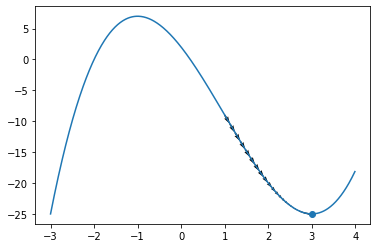

In [6]:
f = lambda x: np.power(x,3)-3*x**2-9*x+2
x = np.arange(-3, 4, 0.01)
y= f(x)
plt.plot(x,y)

path_x = np.asarray(path) #.reshape(-1,1)
path_y=f(path_x)
plt.quiver(path_x[:-1], path_y[:-1], path_x[1:]-path_x[:-1], path_y[1:]-path_y[:-1], scale_units='xy', angles='xy', scale=1, color='k')
plt.scatter(path[-1],f(path[-1]))
plt.show()

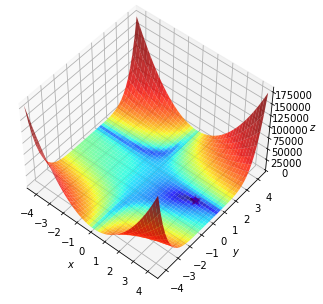

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.colors import LogNorm
import random

%matplotlib inline

f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x_list = np.arange(xmin, xmax + xstep, xstep)
y_list = np.arange(ymin, ymax + ystep, ystep)
x, y = np.meshgrid(x_list, y_list)
z = f(x, y)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

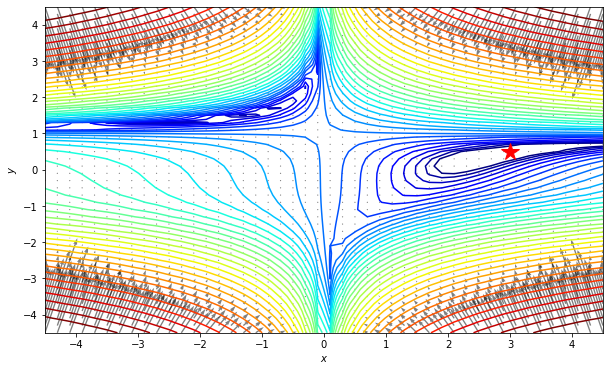

In [9]:
df_x  = lambda x, y: 2*(1.5 - x + x*y)*(y-1) + 2*(2.25 - x + x*y**2)*(y**2-1) + 2*(2.625 - x + x*y**3)*(y**3-1)
df_y  = lambda x, y: 2*(1.5 - x + x*y)*x + 2*(2.25 - x + x*y**2)*(2*x*y) + 2*(2.625 - x + x*y**3)*(3*x*y**2)
dz_dx = df_x(x, y)
dz_dy = df_y(x, y)

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [10]:
df = lambda x: np.array( [2*(1.5 - x[0] + x[0]*x[1])*(x[1]-1) + 2*(2.25 - x[0] + x[0]*x[1]**2)*(x[1]**2-1)
                                        + 2*(2.625 - x[0] + x[0]*x[1]**3)*(x[1]**3-1),
                           2*(1.5 - x[0] + x[0]*x[1])*x[0] + 2*(2.25 - x[0] + x[0]*x[1]**2)*(2*x[0]*x[1]) 
                                         + 2*(2.625 - x[0] + x[0]*x[1]**3)*(3*x[0]*x[1]**2)])

def gradient_descent(df,x,alpha=0.01, iterations = 100,epsilon = 1e-8):
    history=[x]
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        x = x-alpha* df(x)       
        history.append(x)
    return history

In [11]:
x0=np.array([3., 4.])
print("初始点",x0,"的梯度",df(x0))

path = gradient_descent(df,x0,0.000005,300000)
print("极值点：",path[-1])

初始点 [3. 4.] 的梯度 [25625.25 57519.  ]
极值点： [2.70735828 0.41689171]


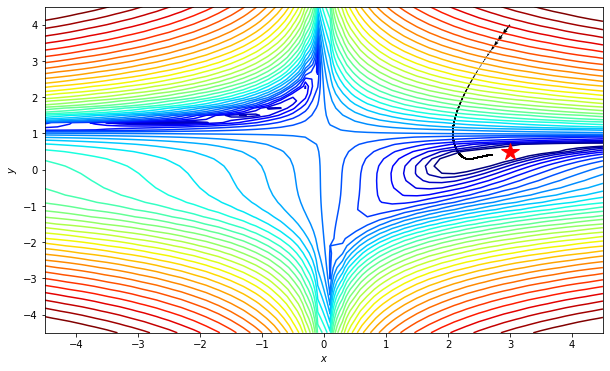

In [12]:
def plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    #ax.scatter(path[0],path[1]);
    ax.quiver(path[:-1,0], path[:-1,1], path[1:,0]-path[:-1,0], path[1:,1]-path[:-1,1], scale_units='xy', angles='xy', scale=1, color='k')
    ax.plot(*minima_, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')    
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))

path = np.asarray(path) 
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

2.3.1 Momentum动量法
基于动量法的梯度下降法：

In [13]:
def gradient_descent_momentum(df,x,alpha=0.01,gamma = 0.8, iterations = 100,epsilon = 1e-6):
    history=[x]
    v= np.zeros_like(x)            #动量
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        v = gamma*v+alpha* df(x)  #更新动量
        x = x-v                   #更新变量（参数）
        
        history.append(x)
    return history

In [14]:
ath = gradient_descent_momentum(df,x0,0.000005,0.8,300000)
print(path[-1])
path = np.asarray(path) 

[2.70735828 0.41689171]


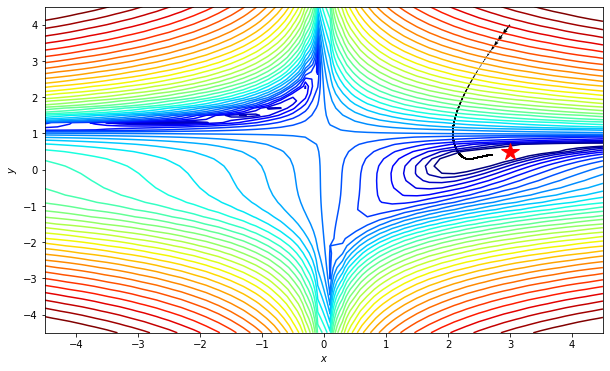

In [15]:
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

2.3.2 Adagrad法

In [16]:
def gradient_descent_Adagrad(df,x,alpha=0.01,iterations = 100,epsilon = 1e-8):
    history=[x]
    #v= np.zeros_like(x) 
    gl = np.ones_like(x)
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        grad = df(x)
        gl += grad**2
        x = x-alpha* grad/(np.sqrt(gl)+epsilon)      
        history.append(x)
    return history

In [17]:
path = gradient_descent_Adagrad(df,x0,0.1,300000,1e-8)
print(path[-1])
path = np.asarray(path) 

[-0.69240717  1.76233766]


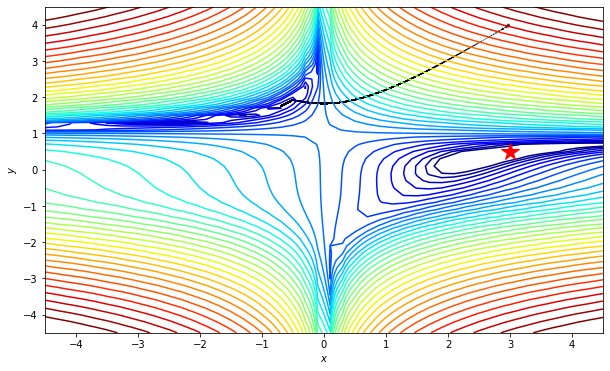

In [18]:
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

2.3.3 Adadelta法

In [19]:
def gradient_descent_Adadelta(df,x,alpha = 0.1,rho=0.9,iterations = 100,epsilon = 1e-8):
    history=[x]    
    Eg = np.ones_like(x)
    Edelta = np.ones_like(x)   
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        grad = df(x)
        Eg = rho*Eg+(1-rho)*(grad**2)        
        delta = np.sqrt((Edelta+epsilon)/(Eg+epsilon))*grad
        x = x- alpha*delta
        Edelta = rho*Edelta+(1-rho)*(delta**2)     
        history.append(x)
    return history

In [20]:
path = gradient_descent_Adadelta(df,x0,1.0,0.9,300000,1e-8)
print(path[-1])
path = np.asarray(path) 

[2.9386002  0.45044889]


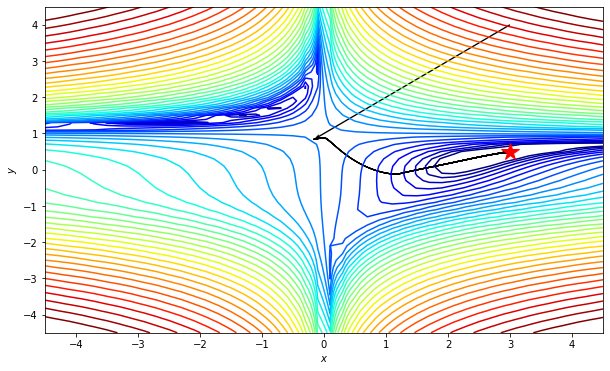

In [21]:
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

2.3.4 RMSprop法

In [24]:
def gradient_descent_RMSprop(df,x,alpha=0.01,beta = 0.9, iterations = 100,epsilon = 1e-8):
    history=[x]   
    v= np.ones_like(x)
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        grad = df(x)       
        v = beta*v+(1-beta)*grad**2       
        x = x-alpha*grad/(np.sqrt(v)+epsilon)
      
        history.append(x)
    return history

In [25]:
path = gradient_descent_RMSprop(df,x0,0.000005,0.99999999999,300000,1e-8)
print(path[-1])
path = np.asarray(path) 

[2.70162562 0.41500366]


In [26]:
path = gradient_descent_RMSprop(df,x0,0.000005,0.99999999999,900000,1e-8)
print(path[-1])
path = np.asarray(path) 

[2.9082809  0.47616156]


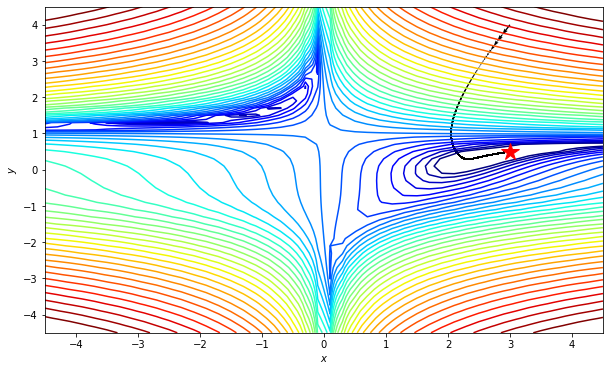

In [27]:
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

2.3.5 Adam法

In [28]:
def gradient_descent_Adam(df,x,alpha=0.01,beta_1 = 0.9,beta_2 = 0.999, iterations = 100,epsilon = 1e-8):
    history=[x]
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    for t in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        grad = df(x)
        m = beta_1*m+(1-beta_1)*grad
        v = beta_2*v+(1-beta_2)*grad**2
        
        #m_1 = m/(1-beta_1)
        #v_1 = v/(1-beta_2) 
        t = t+1
        if True:
            m_1 = m/(1-np.power(beta_1, t+1))
            v_1 = v/(1-np.power(beta_2, t+1))     
        else:        
            m_1 = m / (1 - np.power(beta_1, t)) + (1 - beta_1) * grad / (1 - np.power(beta_1, t))
            v_1 = v / (1 - np.power(beta_2, t))
    
        x = x-alpha*m_1/(np.sqrt(v_1)+epsilon)
        #print(x)
        history.append(x)
    return history

In [29]:
path = gradient_descent_Adam(df,x0,0.001,0.9,0.8,100000,1e-8)
#path = gradient_descent_Adam(df,x0,0.000005,0.9,0.9999,300000,1e-8)
print(path[-1])
path = np.asarray(path) 
#plt.plot(path)

[2.99998362 0.50001619]


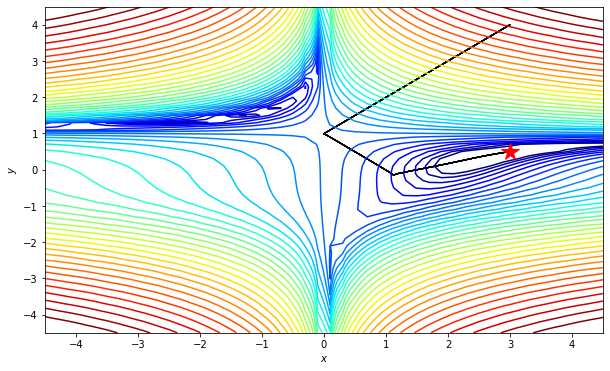

In [30]:
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)